# Classification case study - Ensemble methods

# import libraries

In [1]:
# IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "white")

# Load data from final train csv

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
X = train.drop(columns = ["Outcome"])
y = train.Outcome

In [4]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'InsulinLog'],
      dtype='object')

# Split data into train and test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Bagging - Random state classifier

In [6]:
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [7]:
model = RandomForestClassifier(n_estimators = 5, max_depth = 5, random_state = 1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [8]:
model.score(X_train, y_train)

0.8387622149837134

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7922077922077922

# internal decision trees

In [11]:
for count,tree in enumerate(model.estimators_):
    # PRINT TREE FOR EACH CLASSIFIER
    tree_rules = export_text(tree, feature_names = list(X_train.columns))
    print("Tree  :", count + 1)
    print(tree_rules)

Tree  : 1
|--- Glucose <= 123.50
|   |--- BMI <= 45.40
|   |   |--- Pregnancies <= 6.50
|   |   |   |--- Age <= 30.50
|   |   |   |   |--- SkinThickness <= 29.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- SkinThickness >  29.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Age >  30.50
|   |   |   |   |--- InsulinLog <= 5.14
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- InsulinLog >  5.14
|   |   |   |   |   |--- class: 0.0
|   |   |--- Pregnancies >  6.50
|   |   |   |--- BMI <= 26.65
|   |   |   |   |--- class: 0.0
|   |   |   |--- BMI >  26.65
|   |   |   |   |--- Glucose <= 103.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Glucose >  103.00
|   |   |   |   |   |--- class: 1.0
|   |--- BMI >  45.40
|   |   |--- BloodPressure <= 87.00
|   |   |   |--- BloodPressure <= 79.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- BloodPressure >  79.00
|   |   |   |   |--- class: 1.0
|   |   |--- BloodPressure >  87.00
|   |   |   |--- class: 0.0

In [12]:
confusion_matrix(y_test, y_pred)

array([[92, 15],
       [17, 30]], dtype=int64)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.67      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



# Boosting - GradientBoostingClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
model = GradientBoostingClassifier(n_estimators = 10, max_depth = 8)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=10)

In [16]:
model.score(X_train, y_train)

0.9853420195439739

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.7727272727272727

In [19]:
confusion_matrix(y_test, y_pred)

array([[90, 17],
       [18, 29]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.63      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



# Displaying errors

In [21]:
errors = {}
tree_counts = [1, 2, 3, 4, 5, 8, 10]
for count in tree_counts:
    model = GradientBoostingClassifier(n_estimators = count)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    errors[count] = 1 - score   # ERRORS

In [22]:
errors

{1: 0.30519480519480524,
 2: 0.30519480519480524,
 3: 0.30519480519480524,
 4: 0.24675324675324672,
 5: 0.2272727272727273,
 8: 0.2272727272727273,
 10: 0.22077922077922074}

# DRAW GRAPH TO SHOW ERROR RATE BASED ON NUMBER OF TREES

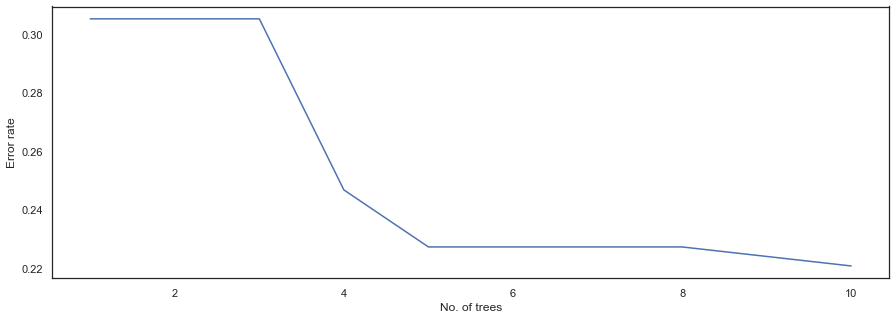

In [23]:
plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("No. of trees")
plt.ylabel("Error rate")
plt.gcf().set_size_inches(15, 5)

# Stacking - StackingClassifier

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [25]:
estimators = [
    ('lr',  LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC()),
]

In [26]:
clf = StackingClassifier(estimators = estimators, final_estimator = DecisionTreeClassifier())

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [29]:
X_test_scaled = ss.transform(X_test)

In [30]:
clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=DecisionTreeClassifier())

In [31]:
clf.score(X_train_scaled, y_train)

0.7065972222222222

In [32]:
clf.score(X_test_scaled, y_test)

0.6458333333333334

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
estimators = [
    ('nb',  GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC()),
]

In [35]:
clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [38]:
clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('nb', GaussianNB()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=LogisticRegression())

In [39]:
clf.score(X_train_scaled, y_train)

0.8142361111111112

In [40]:
clf.score(X_test_scaled,y_test) 

0.5885416666666666

In [41]:
!!cd

['C:\\Users\\nagal\\demo\\diabetes']